voor het verwijderen van de NaN-waarden
userId                        0
activity_ids                  0
speeds                        0
distances                     0
average_heartrates            0
altitude_changes              0
locations                     0
condition_values              0
average_location              0
average_speeds                0
std_speeds                    0
average_distances             0
std_distances                 0
average_average_heartrates    0
std_average_heartrates        0
average_altitude_changes      0
std_altitude_changes          0
average_condition_value       0
std_condition_values          0
weight_std_distance           0
weight_std_altitude_change    0
weight_std_condition_value    0
dtype: int64
latitude                   0
longitude                  0
altitude                   0
sport                      0
id                         0
heart_rate                 0
timestamp                  0
speeds                     0
distance   

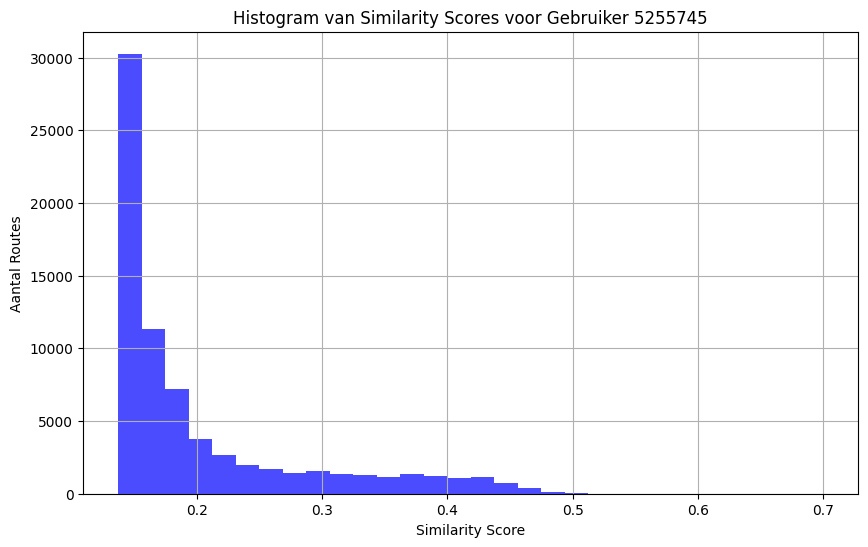

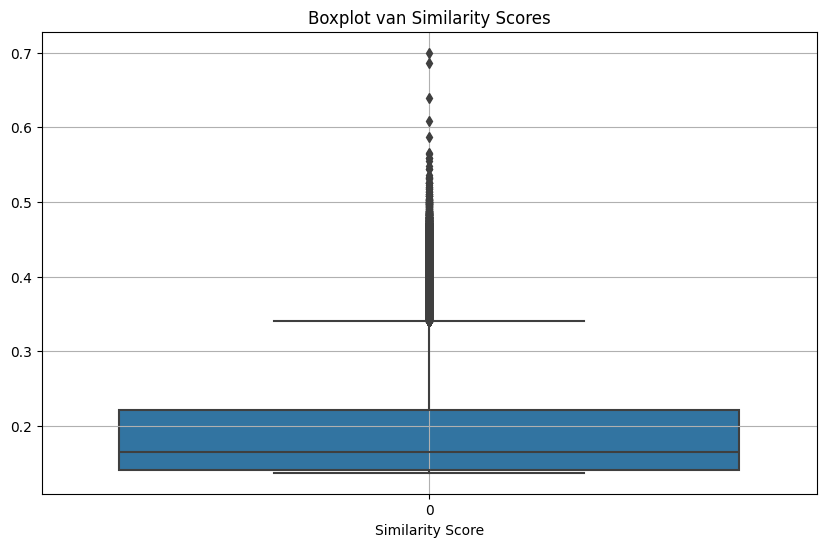

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speeds,distance,altitude_change,userId,average_condition_value,mean_altitude,mean_latitude,mean_longitude,distance_to_user,similarity_score
5896,"[55.87007028982043, 55.87007028982043, 55.8699...","[12.243089061230421, 12.243089061230421, 12.24...","[35.0, 35.0, 34.2, 33.6, 33.6, 33.6, 33.6, 33....",bike,246234604,"[87, 87, 90, 91, 92, 91, 91, 92, 92, 91, 90, 8...","[1379252521, 1379252523, 1379252527, 137925252...","[0.0, 15.28962432389982, 20.842605592878787, 2...",5.173142,4.6,804068,5.539280,34.8172,55.864907,12.241780,8.470988,0.699752
5572,"[55.97235331311822, 55.97234250046313, 55.9723...","[12.231003362685442, 12.23098031245172, 12.230...","[14.0, 14.0, 14.0, 14.4, 14.2, 13.8, 13.4, 13....",bike,600646665,"[90, 90, 93, 93, 94, 94, 94, 95, 95, 95, 95, 9...","[1442061634, 1442061635, 1442061637, 144206163...","[6.754817763734733, 9.970641612088471, 13.3588...",3.046108,12.4,804068,5.539280,17.2024,55.972089,12.237933,5.652065,0.685874
20547,"[55.92181974090636, 55.921824518591166, 55.921...","[12.298515820875764, 12.298486987128854, 12.29...","[28.0, 28.0, 28.0, 28.0, 27.4, 27.4, 27.4, 27....",bike,76043154,"[112, 112, 113, 114, 115, 116, 119, 120, 121, ...","[1343412318, 1343412319, 1343412321, 134341232...","[6.766187575040091, 7.537541792910819, 14.4621...",8.621939,14.2,1035156,5.620282,29.3116,55.925124,12.284990,6.577832,0.639773
18969,"[56.0115612, 56.0115886, 56.0116317, 56.011669...","[11.9759511, 11.9759291, 11.9758292, 11.975708...","[21.4, 21.2, 20.8, 20.6, 19.8, 19.4, 18.8, 18....",bike,184866422,"[103, 103, 100, 98, 97, 98, 100, 100, 100, 100...","[1367011757, 1367011758, 1367011761, 136701176...","[12.042646288024953, 9.437857161474962, 15.496...",7.558910,15.4,96628,6.673401,11.5764,56.014717,11.999564,14.526591,0.607859
69854,"[55.932826437056065, 55.932826437056065, 55.93...","[12.284899754449725, 12.284899754449725, 12.28...","[0.4, 0.4, 0.4, 0.6000000000000001, 0.4, 0.4, ...",bike,374287731,"[127, 129, 130, 131, 131, 131, 132, 131, 131, ...","[1396209864, 1396209869, 1396209875, 139620988...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.200769624070776, 0...",0.078551,3.8,4161148,2.843241,1.7872,55.932852,12.284860,6.513336,0.587417


In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
import folium
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns 

# Pad naar de bestanden
user_profiles_path = '../Data/Fietsdata/grotebestanden/bike_gebruikersprofielen2.json'
routes_path = '../Data/Fietsdata/grotebestanden/fietsroutes_aangepast_clean.json'

# Stap 1: Laad de gebruikersprofielen en routes
# with open(user_profiles_path, 'r') as file:
#     user_profiles_content = (json.loads(line) for line in file)
#     user_profiles_df = pd.DataFrame(user_profiles_content)

# with open(routes_path, 'r') as file:
#     routes_content = [json.loads(line) for line in file if line.strip()]

# routes_df = pd.DataFrame(routes_content)

user_profiles_df = pd.read_json(user_profiles_path, lines=True)
routes_df = pd.read_json(routes_path, lines=True)

print("voor het verwijderen van de NaN-waarden")
print(user_profiles_df.isna().sum())
print(routes_df.isna().sum())

# Verwijder rijen met NaN-waarden in 'userId' en 'average_condition_value'
routes_df.dropna(subset=['userId', 'average_condition_value'], inplace=True)

print("na het verwijderen van de NaN-waarden")
print(user_profiles_df.isna().sum())
print(routes_df.isna().sum())

# Stap 2: Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# scaler = MinMaxScaler()
# user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']] = scaler.fit_transform(user_profiles_df[['average_speeds', 'average_altitude_changes', 'average_distances', 'average_condition_value']])
# routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']] = scaler.fit_transform(routes_df[['altitude_change', 'distance', 'mean_altitude', 'average_condition_value']])

# Stap 3: Bepaal gewichten voor gebruikerskenmerken

gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0}

# Stap 4: Definieer aanbevelingsfunctie voor routes

def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, top_n=10):
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id]
    user_location = (user_data['most_common_lat'].iloc[0], user_data['most_common_lon'].iloc[0])


    # Bereken de afstand tussen de gebruiker en elke route
    def calculate_distance_to_user(row):
        route_location = (row['mean_latitude'], row['mean_longitude'])
        distance_to_user = geodesic(user_location, route_location).kilometers
        return distance_to_user

    routes_df['distance_to_user'] = routes_df.apply(calculate_distance_to_user, axis=1)

    # Functie om de cosine similarity te berekenen
    def calculate_cosine_similarity(row):
        user_values = user_data[['average_altitude_changes', 'average_distances', 'average_condition_value']].values[0]
        route_values = row[['altitude_change', 'distance', 'distance_to_user', 'average_condition_value']]

        # Bereken de gewogen waarden
        gewogen_user_values = np.array([
            user_values[0] * gewichten[user_id]['average_altitude_change'],
            user_values[1] * gewichten[user_id]['average_distance'],
            user_values[2] * gewichten[user_id]['average_condition_value'],
            gewichten[user_id]['distance_to_user']])

        gewogen_route_values = np.array([
            route_values['altitude_change'],
            route_values['distance'],
            route_values['average_condition_value'],
            route_values['distance_to_user']])

        # Cosine similarity berekenen
        return cosine_similarity([gewogen_user_values], [gewogen_route_values])[0][0]


    # Pas de cosine similarity functie toe en sla de score op
    routes_df['similarity_score'] = routes_df.apply(calculate_cosine_similarity, axis=1)
# Selecteer de routes met de hoogste cosine similarity scores
    recommended_routes = routes_df.sort_values(by='similarity_score', ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    plt.hist(routes_df['similarity_score'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histogram van Similarity Scores voor Gebruiker {user_id}')
    plt.xlabel('Similarity Score')
    plt.ylabel('Aantal Routes')
    plt.grid(True)
    plt.show()

    # Aan het einde van je script, na het genereren van het histogram
    plt.figure(figsize=(10, 6))
    sns.boxplot(routes_df['similarity_score'])
    plt.title('Boxplot van Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.grid(True)
    plt.show()
    # Stap 5: Creëer een kaart met de locatie van de gebruiker en de routes
    user_data = user_profiles_df[user_profiles_df['userId'] == sample_user_id].iloc[0]
    user_popup_info = f"UserID: {sample_user_id}<br>" \
                    f"Average Altitude Change: {user_data['average_altitude_changes']}<br>" \
                    f"Average Distance: {user_data['average_distances']}<br>" \
                    f"Average Condition Value: {user_data['average_condition_value']}"

    # Voor satellietbeeld, vervang 'Stamen Terrain' met 'Stamen Toner' of 'Mapbox Satellite'
    # map_obj = folium.Map(location=user_location, zoom_start=12, tiles='Stamen Toner')
    mapbox_tileset = 'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1IjoicnVwYXR0eW4iLCJhIjoiY2xyaWU2NG9nMDd6dzJtcDhwMHp5NWV3biJ9.bHb-trK3I9Z0H2uWRSoWow'
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles=mapbox_tileset, attr='Mapbox')

    folium.Marker(user_location, popup=user_popup_info).add_to(map_obj)

    # Definieer een lijst met kleuren
    colors = ["red", "blue", "green", "purple", "orange"]

    for index, route in enumerate(recommended_routes.iterrows()):
        _, route_data = route
        route_coords = list(zip(route_data['latitude'], route_data['longitude']))
        route_color = colors[index % len(colors)]  # Wijs een kleur toe aan elke route
        route_popup_info = f"Route ID: {route_data['id']}<br>" \
                        f"User ID: {route_data['userId']}<br>" \
                        f"Average Altitude Change: {route_data['altitude_change']}<br>" \
                        f"Average Distance: {route_data['distance']}<br>" \
                        f"Average Condition Value: {route_data['average_condition_value']}"
        folium.PolyLine(route_coords, color=route_color, weight=2.5, opacity=1, popup=route_popup_info).add_to(map_obj)

    display(map_obj)  # Toon de kaart direct


    return recommended_routes


# Stap 6: Test de functie voor een specifieke gebruiker


# sample_user_id = 10921915
# sample_user_id = 13693003
# sample_user_id = 9225240
# sample_user_id = 7898832
sample_user_id = 5255745
if sample_user_id in gewichten:
    print(f"Gewichten voor gebruiker {sample_user_id}: {gewichten[sample_user_id]}")
else:
    print(f"Geen gewichten gevonden voor gebruiker {sample_user_id}")

recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

recommended_routes.head()
